# Proyecto: Prediccion de Churn en Clientes Telco

## 1. Definicion del problema

En la industria de las telecomunicaciones, la competencia es alta y los costos de adquirir nuevos clientes suelen ser mayores que los de retener a los existentes. Cuando un cliente decide abandonar la compania (A esto se le llama churn), no solo se pierde el ingreso recurrente asociado a ese contrato, sino que ademas se incurre en costos adicionales si se quiere reemplazarlo por un nuevo cliente.

Por esta razon, poder anticipar el churn resulta clave para:
- Identificar clientes en riesgo antes de que abandonen.
- Disenar campanas de retencion mas focalizadas.
- Optimizar el uso del presupuesto comercial.

En este proyecto se trabaja con el dataset Telco Customer Churn, que contiene informacion de clientes de una empresa de telecomunicaciones como el tipo de contrato, servicios contratados, metodo de pago, cargos mensuales, etc.

### Objetivo analitico

El objetivo principal es construir un modelo de clasificacion binaria que permita predecir la probabilidad de que un cliente haga churn.

La variable objetivo es `Churn`:
- `Churn = "Yes"`: el cliente abandono la compania.
- `Churn = "No"`: el cliente se mantuvo activo.

A partir de este modelo, se busca:
- Comparar distintos algoritmos de clasificacion.
- Evaluar su desempeno con las metricas accuracy, F1, precision, recall, ROC-AUC.
- Interpretar que variables se asocian mas fuertemente al churn para proponer acciones de negocio.

## 2. Carga de datos y vista general

En esta seccion se realiza:
- La carga del dataset original desde el archivo CSV.
- Una primera vista de las dimensiones del dataset.
- Revision de las primeras filas (`head`) y de los tipos de datos de cada columna.

Esto permite entender la estructura general de la informacion antes de pasar al analisis exploratorio y al preprocesamiento.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ruta_datos = "WA_Fn-UseC_-Telco-Customer-Churn.csv" #ruta del dataset
df_clientes = pd.read_csv(ruta_datos) #dataset
print("Dataset cargado correctamente")

Dataset cargado correctamente


In [ ]:
#Dimension del dataset
print("Filas y columnas del dataset:", df_clientes.shape)
print("\nPrimeras 5 filas:")
display(df_clientes.head())
("\nInformacion del dataframe:")
df_clientes.info()

Filas y columnas del dataset: (7043, 21)

Primeras 5 filas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print("Valores unicos de la variable objetivo Churn:")
print(df_clientes["Churn"].value_counts())

Valores unicos de la variable objetivo Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


## 3. Analisis exploratorio de datos (EDA)

En esta seccion revisamos la estructura del dataset, tipos de variables, estadisticas descriptivas y algunos patrones iniciales relacionados con la variable objetivo `Churn`. El objetivo es entender mejor los datos antes de pasar al preprocesamiento y al modelado.

Puntos clave a revisar:
- Que columnas son numericas y cuales son categoricas.
- Estadisticas basicas de las variables numericas (media, desviacion estandar, min, max).
- Distribucion de la variable objetivo `Churn`.
- Presencia de valores faltantes o datos problematicos (por ejemplo, espacios en blanco en columnas numericas).

In [ ]:
#Columnas
c_numericas = df_clientes.select_dtypes(include=np.number).columns.tolist()
c_categoricas = df_clientes.select_dtypes(exclude=np.number).columns.tolist()
print("Columnas numericas:")
print(c_numericas)
print("\nColumnas categoricas:")
print(c_categoricas)
print("\nEstadisticas descriptivas de variables numericas:")
display(df_clientes[c_numericas].describe())

Columnas numericas:
['SeniorCitizen', 'tenure', 'MonthlyCharges']

Columnas categoricas:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Estadisticas descriptivas de variables numericas:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Conteo de valores nulos por columna
print("Valores nulos por columna:")
print(df_clientes.isnull().sum())
mascara_espacios = df_clientes["TotalCharges"].astype(str).str.strip() == ""
print("\nFilas con TotalCharges vacio:", mascara_espacios.sum())
display(df_clientes[mascara_espacios].head())

Valores nulos por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Filas con TotalCharges vacio: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


Conteo de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Porcentaje de Churn:
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


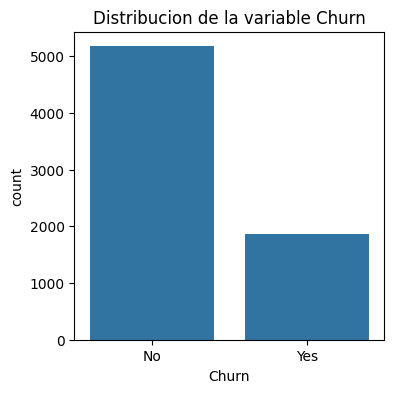

In [ ]:
#Distribucion de la variable objetivo Churn
conteo_churn = df_clientes["Churn"].value_counts()
porcentaje_churn = df_clientes["Churn"].value_counts(normalize=True) * 100
print("Conteo de Churn:")
print(conteo_churn)
print("\nPorcentaje de Churn:")
print(porcentaje_churn.round(2))
plt.figure(figsize=(4,4))
sns.countplot(data=df_clientes, x="Churn")
plt.title("Distribucion de la variable Churn")
plt.show()

In [ ]:
vars_interes = ["tenure", "MonthlyCharges"]
print("Estadisticas por Churn para variables numericas seleccionadas:\n")
display(df_clientes.groupby("Churn")[vars_interes].describe())

Estadisticas por Churn para variables numericas seleccionadas:



tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      MonthlyCharges                                                            
               count       mean        std    min    25%     50%   75%     max  
Churn                                                                           
No            5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75  
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

## 4. Visualizacion descriptiva

En esta seccion se exploran visualmente las relaciones entre algunas variables clave y la variable objetivo `Churn`. El objetivo es identificar patrones que ayuden a entender mejor las diferencias entre clientes que se quedan y clientes que abandonan la compania.

Se revisaran:
- Variables numericas: `tenure`, `MonthlyCharges`, `TotalCharges`.
- Variables categoricas: tipo de contrato, servicio de internet, metodo de pago, entre otras.
- Correlaciones entre variables numericas.

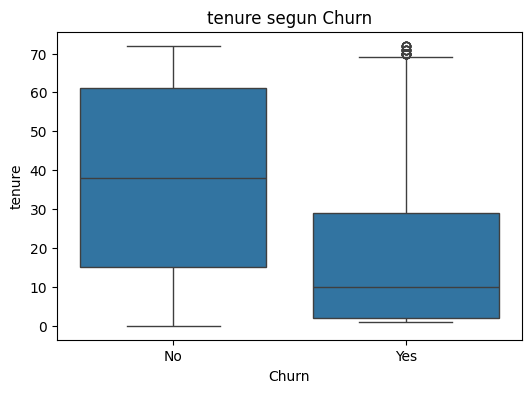

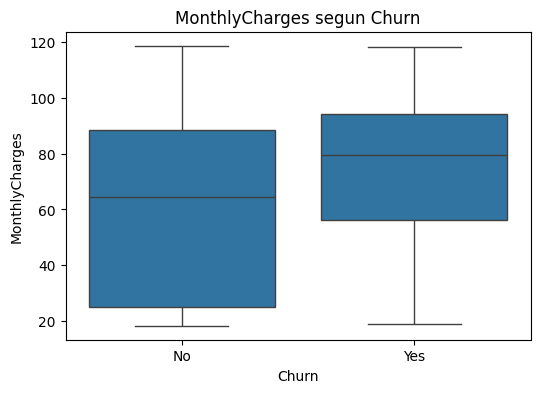

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clientes, x="Churn", y="tenure")
plt.title("tenure segun Churn")
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clientes, x="Churn", y="MonthlyCharges")
plt.title("MonthlyCharges segun Churn")
plt.show()

Se observa que los clientes con Churn tienden a tener menor tiempo de permanencia (tenure) y, en muchos casos, cargos mensuales (MonthlyCharges) algo distintos respecto de los clientes que no hacen churn.

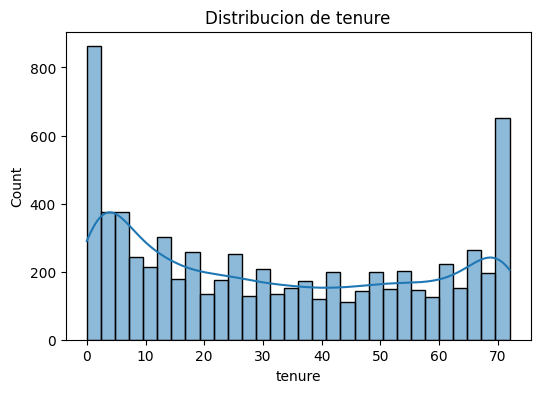

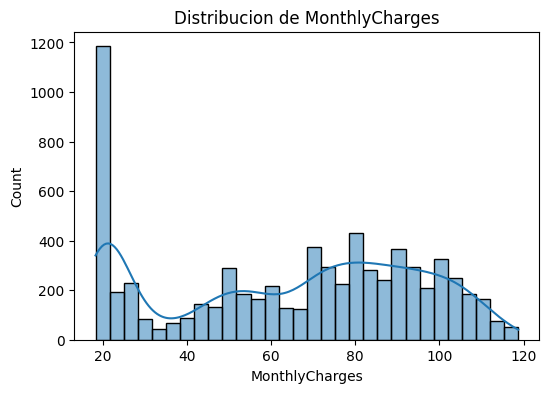

In [ ]:
#Histograma de tenure
plt.figure(figsize=(6,4))
sns.histplot(data=df_clientes, x="tenure", bins=30, kde=True)
plt.title("Distribucion de tenure")
plt.show()

#Histograma de MonthlyCharges
plt.figure(figsize=(6,4))
sns.histplot(data=df_clientes, x="MonthlyCharges", bins=30, kde=True)
plt.title("Distribucion de MonthlyCharges")
plt.show()

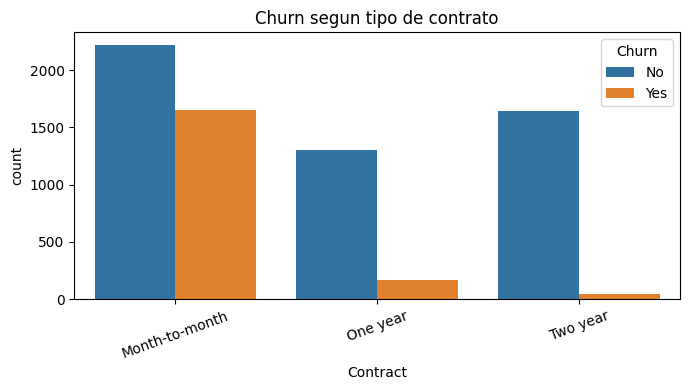

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df_clientes, x="Contract", hue="Churn")
plt.title("Churn segun tipo de contrato")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

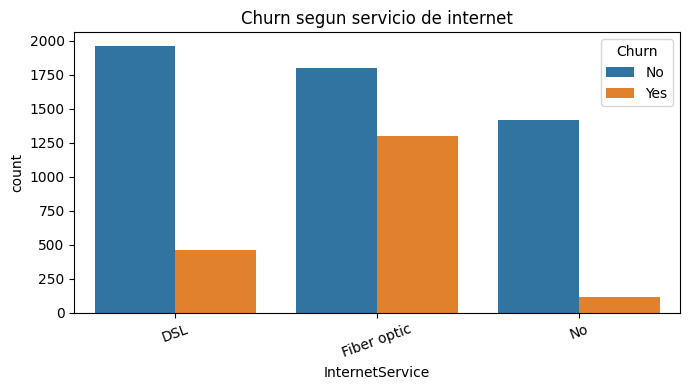

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df_clientes, x="InternetService", hue="Churn")
plt.title("Churn segun servicio de internet")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

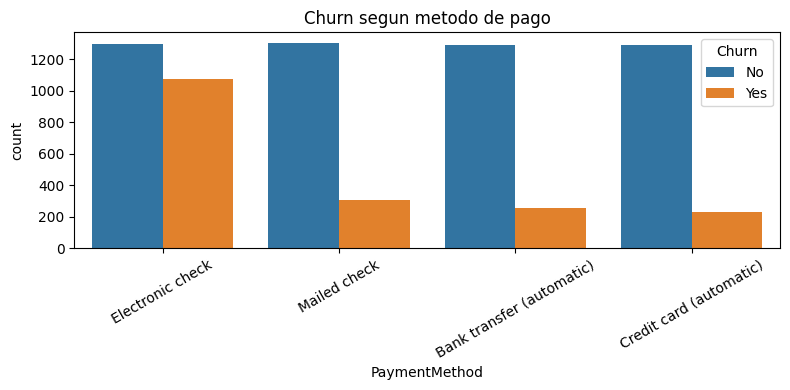

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_clientes, x="PaymentMethod", hue="Churn")
plt.title("Churn segun metodo de pago")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Se aprecia que el churn es mas frecuente en ciertos tipos de contrato y en algunos metodos de pago especificos. Esto puede decir que las condiciones de contrato y la forma de pago pueden influir en la probabilidad de abandono.


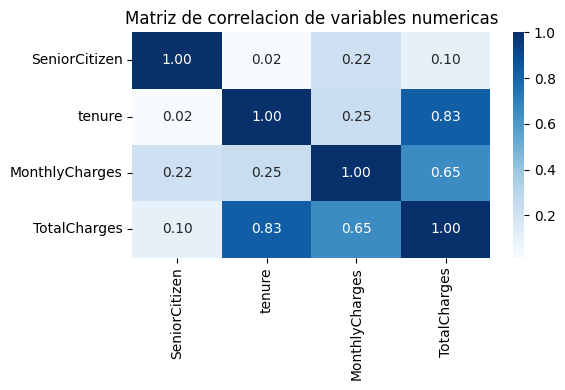

In [ ]:
df_corr = df_clientes.copy()
df_corr["TotalCharges"] = pd.to_numeric(df_corr["TotalCharges"], errors="coerce")
df_corr = df_corr.dropna(subset=["TotalCharges"])
matriz_corr = df_corr[["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de correlacion de variables numericas")
plt.tight_layout()
plt.show()


Las correlaciones entre las variables numericas no son extremadamente altas, pero se observa relacion entre `MonthlyCharges` y `TotalCharges`, y entre `tenure` y `TotalCharges`, lo cual es razonable dado que el total cobrado depende del tiempo y del cargo mensual.


## 5. Preprocesamiento de datos

En esta seccion se prepara el dataset para entrenar modelos de machine learning.  
Las tareas principales son:

- Crear una copia del dataset original para modelado.
- Convertir la variable `TotalCharges` a numerica y manejar los valores vacios.
- Eliminar la columna de identificador `customerID`.
- Definir la variable objetivo como numerica `Churn_binaria`.
- Separar columnas numericas y categoricas.
- Dividir en conjuntos de entrenamiento y prueba.
- Revisar el desbalance de la variable objetivo.

In [ ]:
df_modelo = df_clientes.copy() #copia del df
#Convertir TotalCharges a numerico
df_modelo["TotalCharges"] = pd.to_numeric(df_modelo["TotalCharges"], errors="coerce")
print("Valores nulos en TotalCharges: ")
print(df_modelo["TotalCharges"].isna().sum())
df_modelo = df_modelo.dropna(subset=["TotalCharges"])
print("Filas en TotalCharges:", df_modelo.shape[0])

Valores nulos en TotalCharges: 
11
Filas en TotalCharges: 7032


In [ ]:
if "customerID" in df_modelo.columns:
    df_modelo = df_modelo.drop(columns=["customerID"])
print("Columnas actuales del dataframe de modelo:")
print(df_modelo.columns.tolist())

Columnas actuales del dataframe de modelo:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
#Crear variable objetivo numerica
df_modelo["Churn_binaria"] = df_modelo["Churn"].map({"No": 0, "Yes": 1})
print("Distribucion de Churn_binaria:")
print(df_modelo["Churn_binaria"].value_counts())

Distribucion de Churn_binaria:
Churn_binaria
0    5163
1    1869
Name: count, dtype: int64


En la variable objetivo `Churn_binaria` se observa que aproximadamente 5163 clientes (73.4 %) pertenecen a la clase 0 (no churn) y 1869 clientes (26.6 %) pertenecen a la clase 1 (churn).  
Esto confirma un desbalance moderado de clases que debe considerarse al momento de entrenar los modelos.


In [ ]:
#Columnas
c_numericas = df_modelo.select_dtypes(include=np.number).columns.tolist()
c_numericas = [c for c in c_numericas if c != "Churn_binaria"]
c_categoricas = [c for c in df_modelo.columns if c not in c_numericas + ["Churn", "Churn_binaria"]]
print("Columnas numericas para el modelo:")
print(c_numericas)
print("\nColumnas categoricas para el modelo:")
print(c_categoricas)


Columnas numericas para el modelo:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Columnas categoricas para el modelo:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
from sklearn.model_selection import train_test_split
#Matriz de caracteristicas y vector objetivo
X = df_modelo[c_numericas + c_categoricas]
y = df_modelo["Churn_binaria"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Tamanos de los conjuntos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Tamanos de los conjuntos:
X_train: (5625, 19)
X_test: (1407, 19)
y_train: (5625,)
y_test: (1407,)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

transformador_numerico = StandardScaler()
transformador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador = ColumnTransformer(
    transformers=[("num", transformador_numerico, c_numericas),
                  ("cat", transformador_categorico, c_categoricas),])

In [ ]:
from collections import Counter
print("Distribucion de clases en y_train:")
print(Counter(y_train))

Distribucion de clases en y_train:
Counter({0: 4130, 1: 1495})


Se observa que la clase 0 (clientes que no hacen churn) es mas numerosa que la clase 1 (clientes que si hacen churn).  
Este desbalance se tendra en cuenta en la etapa de modelado, utilizando tecnicas como SMOTE o ajustando pesos de clase en algunos modelos.


## 6. Seleccion y comparacion de modelos

En esta seccion se entrenan y comparan diferentes modelos supervisados de clasificacion para predecir la probabilidad de churn.

Modelos que vamos a considerar:
- Regresion logistica
- Random Forest
- XGBoost
- KNN

Para tres de ellos se realiza ajuste de hiperparametros

Todos los modelos se entrenan usando un pipeline que incluye:
- El preprocesamiento definido anteriormente.
- Una etapa de balanceo de clases mediante SMOTE.
- El clasificador correspondiente.


In [ ]:
#Librerias para esta parte
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve

In [ ]:
resultados_modelos = []

def evaluar_modelo(nombre_modelo, y_test, y_pred, y_proba):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\nResultados para {nombre_modelo}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1_score: {f1:.4f}")
    print(f"ROC_AUC: {roc_auc:.4f}")

    resultados_modelos.append({"modelo": nombre_modelo,
                               "accuracy": acc,
                               "precision": prec,
                               "recall": rec,
                               "f1": f1,
                               "roc_auc": roc_auc})

In [ ]:
smote = SMOTE(random_state=42)

pipe_logreg = ImbPipeline(steps=[("preprocesamiento", preprocesador),
                                 ("smote", smote),
                                 ("modelo", LogisticRegression(max_iter=1000, solver="lbfgs"))])
param_grid_logreg = {"modelo__C": [0.01, 0.1, 1, 10],
                     "modelo__penalty": ["l2"]}
grid_logreg = GridSearchCV(estimator=pipe_logreg,
                           param_grid=param_grid_logreg,
                           scoring="f1",
                           cv=5,
                           n_jobs=-1,
                           verbose=1)
grid_logreg.fit(X_train, y_train)
print("Mejores hiperparametros Regresion logistica:")
print(grid_logreg.best_params_)
mejor_logreg = grid_logreg.best_estimator_
y_pred_logreg = mejor_logreg.predict(X_test)
y_proba_logreg = mejor_logreg.predict_proba(X_test)[:, 1]
evaluar_modelo("Regresion logistica", y_test, y_pred_logreg, y_proba_logreg)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparametros Regresion logistica:
{'modelo__C': 0.01, 'modelo__penalty': 'l2'}

Resultados para Regresion logistica:
Accuracy: 0.7363
Precision: 0.5026
Recall: 0.7620
F1_score: 0.6057
ROC_AUC: 0.8328


In [ ]:
pipe_rf = ImbPipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("smote", SMOTE(random_state=42)),
    ("modelo", RandomForestClassifier(random_state=42))
])

param_dist_rf = {"modelo__n_estimators": [100, 200, 300],
                 "modelo__max_depth": [None, 5, 10, 20],
                 "modelo__min_samples_split": [2, 5, 10],
                 "modelo__min_samples_leaf": [1, 2, 4],
                 "modelo__class_weight": [None, "balanced"]}
random_rf = RandomizedSearchCV(estimator=pipe_rf,
                               param_distributions=param_dist_rf,
                               n_iter=20,
                               scoring="f1",
                               cv=5,
                               n_jobs=-1,
                               random_state=42,
                               verbose=1)
random_rf.fit(X_train, y_train)
print("Mejores hiperparametros Random Forest:")
print(random_rf.best_params_)
mejor_rf = random_rf.best_estimator_
y_pred_rf = mejor_rf.predict(X_test)
y_proba_rf = mejor_rf.predict_proba(X_test)[:, 1]
evaluar_modelo("Random Forest", y_test, y_pred_rf, y_proba_rf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparametros Random Forest:
{'modelo__n_estimators': 100, 'modelo__min_samples_split': 10, 'modelo__min_samples_leaf': 4, 'modelo__max_depth': 5, 'modelo__class_weight': 'balanced'}

Resultados para Random Forest:
Accuracy: 0.7576
Precision: 0.5317
Recall: 0.7406
F1_score: 0.6190
ROC_AUC: 0.8268


In [ ]:
pipe_xgb = ImbPipeline(steps=[("preprocesamiento", preprocesador),
                              ("smote", SMOTE(random_state=42)),
                              ("modelo", XGBClassifier(objective="binary:logistic",
                                                       eval_metric="logloss",
                                                       use_label_encoder=False,
                                                       random_state=42,
                                                       tree_method="hist"))])
param_dist_xgb = {"modelo__n_estimators": [100, 200, 300],
                  "modelo__max_depth": [3, 4, 5, 6],
                  "modelo__learning_rate": [0.01, 0.05, 0.1],
                  "modelo__subsample": [0.8, 1.0],
                  "modelo__cample_bytree": [0.8, 1.0]}

random_xgb = RandomizedSearchCV(estimator=pipe_xgb,
                                param_distributions=param_dist_xgb,
                                n_iter=20,
                                scoring="f1",
                                cv=5,
                                n_jobs=-1,
                                random_state=42,
                                verbose=1)

random_xgb.fit(X_train, y_train)
print("Mejores hiperparametros XGBoost:")
print(random_xgb.best_params_)
mejor_xgb = random_xgb.best_estimator_
y_pred_xgb = mejor_xgb.predict(X_test)
y_proba_xgb = mejor_xgb.predict_proba(X_test)[:, 1]
evaluar_modelo("XGBoost", y_test, y_pred_xgb, y_proba_xgb)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "cample_bytree", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores hiperparametros XGBoost:
{'modelo__subsample': 1.0, 'modelo__n_estimators': 100, 'modelo__max_depth': 3, 'modelo__learning_rate': 0.05, 'modelo__cample_bytree': 1.0}

Resultados para XGBoost:
Accuracy: 0.7676
Precision: 0.5453
Recall: 0.7567
F1_score: 0.6338
ROC_AUC: 0.8369


In [ ]:
pipe_knn = ImbPipeline(steps=[("preprocesamiento", preprocesador),
                              ("smote", SMOTE(random_state=42)),
                              ("modelo", KNeighborsClassifier())])

param_grid_knn = {"modelo__n_neighbors": [3, 5, 7],
                  "modelo__weights": ["uniform", "distance"],
                  "modelo__p": [1, 2]}  # 1 manhattan, 2 euclidiana

grid_knn = GridSearchCV(estimator=pipe_knn,
                        param_grid=param_grid_knn,
                        scoring="f1",
                        cv=3,
                        n_jobs=-1,
                        verbose=1)
grid_knn.fit(X_train, y_train)
print("Mejores hiperparametros KNN:")
print(grid_knn.best_params_)
mejor_knn = grid_knn.best_estimator_
y_pred_knn = mejor_knn.predict(X_test)
y_proba_knn = mejor_knn.predict_proba(X_test)[:, 1]
evaluar_modelo("KNN", y_test, y_pred_knn, y_proba_knn)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejores hiperparametros KNN:
{'modelo__n_neighbors': 7, 'modelo__p': 1, 'modelo__weights': 'uniform'}

Resultados para KNN:
Accuracy: 0.7221
Precision: 0.4846
Recall: 0.7139
F1_score: 0.5773
ROC_AUC: 0.7875


In [ ]:
df_resultados = pd.DataFrame(resultados_modelos)
print("\nResumen comparativo de modelos (ordenado por F1):")
display(df_resultados.sort_values("f1", ascending=False))


Resumen comparativo de modelos (ordenado por F1):


,modelo,accuracy,precision,recall,f1,roc_auc
2,XGBoost,0.767591,0.545279,0.756684,0.633819,0.836856
1,Random Forest,0.757640,0.531670,0.740642,0.618994,0.826805
0,Regresion logistica,0.736318,0.502646,0.762032,0.605739,0.832751
3,KNN,0.722104,0.484574,0.713904,0.577297,0.787462


## 7. Evaluacion de modelos

En esta seccion se comparan los modelos entrenados utilizando curvas ROC para visualizar el compromiso entre tasa de verdaderos positivos y falsos positivos, matriz de confusion y reporte de clasificacion para el mejor modelo segun F1.

El objetivo es entender no solo que modelo tiene mejor metrica global, sino tambien como se comporta respecto a falsos positivos y falsos negativos.

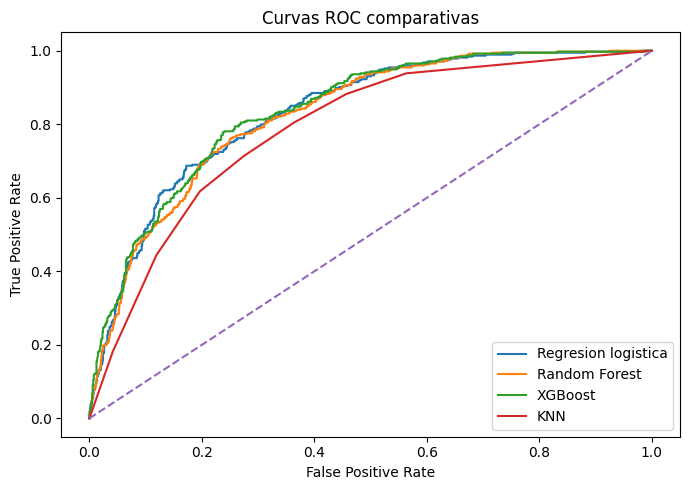

In [ ]:
modelos_info = {"Regresion logistica": (y_pred_logreg, y_proba_logreg),
                "Random Forest": (y_pred_rf, y_proba_rf),
                "XGBoost": (y_pred_xgb, y_proba_xgb),
                "KNN": (y_pred_knn, y_proba_knn)}

plt.figure(figsize=(7,5))
for nombre, (y_pred, y_proba) in modelos_info.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=nombre)
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC comparativas")
plt.legend()
plt.tight_layout()
plt.show()

Mejor modelo segun F1: XGBoost


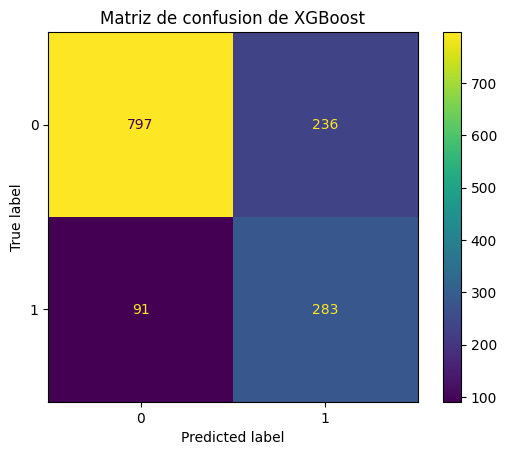

Reporte de clasificacion para el mejor modelo:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.55      0.76      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
#Mejor modelo dependiendo F1
fila_mejor = df_resultados.sort_values("f1", ascending=False).iloc[0]
nombre_mejor = fila_mejor["modelo"]
print("Mejor modelo segun F1:", nombre_mejor)
#Predicciones
y_pred_mejor, y_proba_mejor = modelos_info[nombre_mejor]
#Matriz de confusion
cm = confusion_matrix(y_test, y_pred_mejor)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title(f"Matriz de confusion de {nombre_mejor}")
plt.show()
print("Reporte de clasificacion para el mejor modelo:") #reporte
print(classification_report(y_test, y_pred_mejor))


## 8. Interpretacion del modelo

Para entender mejor que factores estan asociados al churn, se analizo la importancia de variables del modelo **XGBoost**, que fue el que obtuvo el mejor F1 y ROC-AUC en la comparacion de modelos. XGBoost es un modelo de arboles de decision potenciados que permite obtener una medida de importancia para cada caracteristica.

### 8.1. Variables mas influyentes segun XGBoost

El analisis de importancia de variables muestra como mas relevantes:

- **Contract_Month-to-month**: la forma de contrato es una de las variables mas influyentes. Los clientes con contrato mes a mes presentan una probabilidad de churn mucho mayor que aquellos con contratos de uno o dos anios.
- **OnlineSecurity_No** y **TechSupport_No**: no contar con seguridad en linea ni soporte tecnico se asocia fuertemente con mayor churn.
- **PaymentMethod_Electronic check**: los clientes que pagan con electronic check muestran tasas de abandono mas altas que quienes utilizan otros metodos de pago.
- **Contract_Two year** y **Contract_One year**: estos contratos de mayor plazo aparecen como variables importantes y tienden a asociarse con menor probabilidad de abandono.
- **tenure**, **MonthlyCharges** y **TotalCharges**: el tiempo total como cliente y los cargos mensuales / totales influyen de manera importante. En general, los clientes con poco tenure y ciertos niveles de cargo mensual muestran mayor riesgo de abandonar.
- **InternetService_Fiber optic** y otros servicios adicionales (como OnlineBackup, DeviceProtection y servicios de streaming) tambien aportan informacion relevante sobre el comportamiento de churn.

En conjunto, el modelo sugiere que las condiciones contractuales, los servicios de soporte y seguridad, el metodo de pago, la antiguedad del cliente y el nivel de cargos mensuales son los factores mas relevantes para explicar el abandono de clientes.

Top 15 caracteristicas mas importantes segun XGBoost:


,caracteristica,importancia
36,Contract_Month-to-month,0.248653
27,TechSupport_No,0.081998
7,Partner_Yes,0.069101
18,OnlineSecurity_No,0.067204
43,PaymentMethod_Electronic check,0.052408
16,InternetService_Fiber optic,0.039740
5,gender_Male,0.036976
8,Dependents_No,0.035357
30,StreamingTV_No,0.028377
39,PaperlessBilling_No,0.026013


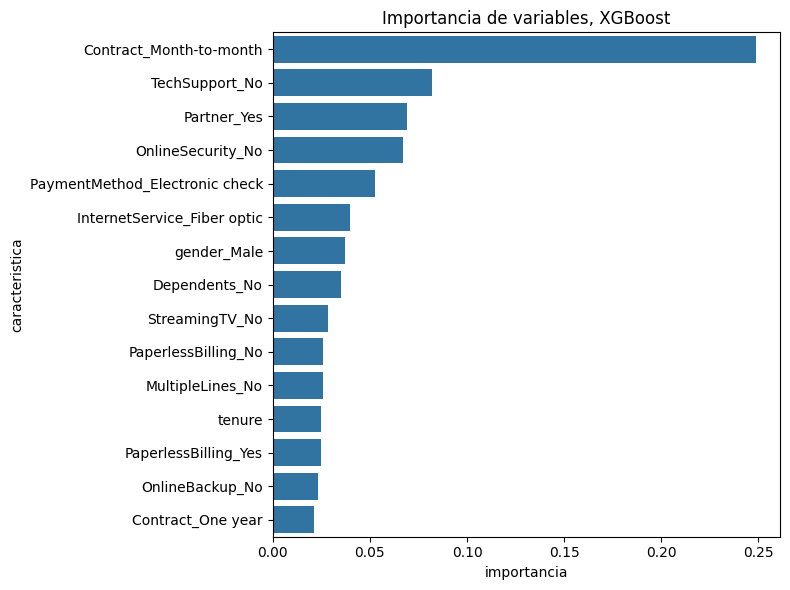

In [ ]:
modelo_interpretar = mejor_xgb
prepro = modelo_interpretar.named_steps["preprocesamiento"]
modelo_xgb = modelo_interpretar.named_steps["modelo"]
ohe = prepro.named_transformers_["cat"]
nombres_cat = ohe.get_feature_names_out(c_categoricas)
nombres_finales = np.concatenate([np.array(c_numericas), nombres_cat])
importancias = modelo_xgb.feature_importances_
df_importancias = pd.DataFrame({
    "caracteristica": nombres_finales,
    "importancia": importancias
}).sort_values("importancia", ascending=False)

print("Top 15 caracteristicas mas importantes segun XGBoost:")
display(df_importancias.head(15))

plt.figure(figsize=(8,6))
sns.barplot(data=df_importancias.head(15), x="importancia", y="caracteristica")
plt.title("Importancia de variables, XGBoost")
plt.tight_layout()
plt.show()


## 9. Conclusiones y recomendaciones

### 9.1. Resumen del problema

El objetivo del proyecto fue predecir que clientes tienen mayor probabilidad de abandonar la compania (`Churn = Yes`) utilizando el dataset Telco Customer Churn.  
Se trabajo con informacion demografica, tipo de contrato, servicios contratados y variables de facturacion.

En el dataset original, aproximadamente el 26.5 % de los clientes hace churn** y **el 73.5 % se mantiene, lo que genera un desbalance moderado de clases que se considero en la etapa de modelado.

### 9.2. Resumen de resultados de modelos

Se entrenaron y compararon cuatro modelos supervisados:

- Regresion logistica  
- Random Forest  
- XGBoost  
- KNN  

Los resultados sobre el conjunto de prueba fueron, aproximadamente:

- **Regresion logistica**: F1 ≈ **0.61**, ROC-AUC ≈ **0.83**.  
- **Random Forest**: F1 ≈ **0.62**, ROC-AUC ≈ **0.83**.  
- **XGBoost**: F1 ≈ **0.63**, ROC-AUC ≈ **0.84**.  
- **KNN**: F1 ≈ **0.58**, ROC-AUC ≈ **0.79**.

Segun la metrica **F1**, el mejor modelo es XGBoost (F1 cercano a 0.63), que ademas obtiene el **mayor ROC-AUC (≈ 0.84)**, mostrando la mejor capacidad de separacion entre clientes con y sin churn.  
Los modelos Random Forest y Regresion logistica logran desempenos muy cercanos, mientras que KNN se ubica ligeramente por debajo.

En el resto del analisis se utiliza XGBoost como modelo principal, tanto para evaluar el desempeno como para interpretar la importancia de variables.

### 9.3. Hallazgos principales sobre churn

A partir del analisis exploratorio y de la importancia de variables, se destacan los siguientes patrones:

- **Contratos mes a mes**: el mayor riesgo de churn se concentra en clientes con contrato `Month-to-month`. Los contratos de uno y dos anios suelen asociarse a menor abandono.
- **Servicios adicionales de seguridad y soporte**: la ausencia de servicios como `OnlineSecurity`, `TechSupport`, `OnlineBackup` o `DeviceProtection` se relaciona con mayor probabilidad de churn.
- **Metodo de pago**: el metodo `Electronic check` se destaca como fuertemente asociado a clientes que abandonan, en comparacion con otros metodos de pago.
- **Facturacion y permanencia**: clientes con poco tenure y ciertos niveles de `MonthlyCharges` muestran mayor riesgo de abandonar, mientras que clientes con mayor antiguedad y mayores `TotalCharges` tienden a ser mas estables.
- **Tipo de servicio de internet**: configuraciones como `InternetService_Fiber optic` y la combinacion de servicios de streaming tambien influyen en la probabilidad de churn.

### 9.4. Recomendaciones de negocio

1. **Campanas de retencion para contratos mensuales**  
   Disenar ofertas especificas (descuentos, beneficios adicionales, upgrade de plan) para clientes con contrato `Month-to-month`, con foco especial en aquellos con poco tenure y cargos mensuales elevados.

2. **Paquetes de valor agregado en seguridad y soporte**  
   Promover paquetes que incluyan `OnlineSecurity` y `TechSupport` a clientes que actualmente no los tienen, ya que la falta de estos servicios se asocia a mayor churn.

3. **Revisar la experiencia de pago con Electronic check**  
   Analizar por que los clientes que pagan con `Electronic check` presentan mas abandono (problemas de experiencia de usuario, recargos, etc.) y evaluar incentivos para migrarlos a metodos de pago mas estables.

4. **Programa de fidelizacion por antiguedad**  
   Implementar beneficios escalonados segun `tenure` (por ejemplo, descuentos o upgrades a partir de cierto tiempo) para incentivar la permanencia.

5. **Uso operativo del modelo XGBoost**  
   Utilizar las probabilidades de churn estimadas por XGBoost para priorizar clientes en riesgo y focalizar campanas de retencion, midiendo posteriormente el impacto de estas acciones.
